### Imports

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

pd.set_option('display.max_columns',99)
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

In [2]:
batting = pd.read_csv('../data/war_daily_bat.txt')
pitching = pd.read_csv('../data/war_daily_pitch.txt')
positions = pd.read_csv('../data/majors_appearances.csv')

# https://github.com/chadwickbureau/register/tree/master/data
# countries = pd.read_csv('../data/countries.csv')
# people = pd.read_csv('../data/people.csv')
# names =  pd.read_csv('../data/names.csv')

In [3]:
# pythonize columns
batting.columns = [col.lower() for col in batting.columns]
pitching.columns = [col.lower() for col in pitching.columns]
positions.columns = [col.lower() for col in positions.columns]

In [4]:
# drop columns not needed for this analysis
batting.drop(['salary'], axis=1, inplace=True)
pitching.drop(['salary'], axis=1, inplace=True)
positions.drop(['how_acquired','total_season','total_league'], axis=1, inplace=True)


|Dataset| # Records | # of Columns|  
| ---------------------------------- | ----------- |---|
|**batting**| 119,681       |49|
| **pitching**   | 53,635        |43|
|**positions**|120,131|26|

### Data Dictionary
#### Player variables
| Column | *dtype* | Description |
| :-- | :-- | :-- |
| name_common | *str* | Name of player |
| age | *float* | Player’s age at midnight of June 30th of that year |
| mlb_id | *float* | UID for player in baseball-reference database |
| player_id | *str* | String-based UID generated as a function of name_common in baseball-reference database |
| year_id | *int* | Year the season took place |
| team_ID | *str* | Abbreviation for the team the season was played for, each team will get a different record if multiple teams were played for within the same year |
| stint_ID | *int* | Order of team played for. 1 for first team, 2 for second, etc. |
| lg_ID | *str* | Abbreviation for the league the team played for was in |
| G | *int* | This includes all times that the player appeared on the lineup card. Pitchers in non-DH games that appeared on the lineup card but didn't bat will still have a game in this column. |
| GS | *int* | Games started |
| pitcher | *bool* | Indicator for player is a pitcher. |
| experience | *int* | Number of seasons played including the record's season |


--------------------


#### Batter-side variables
| Column | *dtype* | Description |
| :-- | :-- | :-- |
| PA | *float* | When available, we use actual plate appearances from play-by-play game accounts. Otherwise estimated using AB + BB + HBP + SF + SH, which excludes catcher interferences. |
| Inn | *float* | Innings played |
| OPS_plus | *float* | 100*[OBP/lg OBP + SLG/lg SLG - 1] Adjusted to the player’s ballpark(s) |
| TOB_lg | *float* | League average for Times on Base. The cumulative total number of times a batter has reached base as a result of hits, walks and hit by pitches. |
| TB_lg | *float* | League average for Total Bases. The number of bases a player has gained with hits. It is a weighted sum for which the weight value is 1 for a single, 2 for a double, 3 for a triple and 4 for a home run |


--------------------


#### Pitcher-side variables
| Column | *dtype* | Description |
| :-- | :-- | :-- |
| IPouts | *int* | Innings pitched expressed as outs |
| IPouts_start | *float* | Innings pitched expressed as outs in a start |
| IPouts_relief | *float* | Innings pitched expressed as outs in relief |
| RA | *int* | Runs Allowed |
| xRA | *float* | The pitcher's expected runs allowed is then the sum of his opposition's run scoring weighted by the innings he faced each team. |
| xRA_sprp_adj | *float* | xRA adjusted such that a SP is expected to give up .1125 runs/game |
| xRA_extras_adj | *float* | Adjustment for placed runner in extra innings |
| xRA_def_pitcher | *float* |  BIP_perc * RS_def_total |
| PPF | *int* | Half home-stadium, half league average |
| PPF_custom | *float* | Custom Park Factors - customized value considering the park factors of the park the pitcher played in. |
| xRA_final | *float* | PPF_custom * (xRA - xRA_def + xRA_sprp_adj) |
| BIP | *float* | Balls in Play |
| BIP_perc | *float* | % of pitcher's team bip for the season that were from that pitcher. (BIP_pitcher)/(BIP_team) |
| RS_def_total | *float* | Total amount runs saved by defense |
| RpO_replacement | *float* | Runs per Out recorded expected by a replacement level pitcher |
| GR_leverage_index_avg | *float* | Solely for relief appearances, this is the average of each appearances opening leverage index weighted by the batters faced in that outing. The average pressure the pitcher or batter saw in this game or season. 1.0 is average pressure, below 1.0 is low pressure and above 1.0 is high pressure." |
| ERA_plus | *float* | 100*[lgERA/ERA] Adjusted to the player’s ballpark(s).|
| ER_lg | *float* | League average for Earned Runs. |


-------------------


#### Position variables
| Column | *dtype* | Description |
| :-- | :-- | :-- |
| G_all | *int* | Total Games |
| G_batting | *int* | Games which a PA position occurred |
| GS_defense | *float* | Games started in which a position was played |
| G_defense | *float* | Games in which a position was played |
| G_p | *int* | Games in which the pitcher position was played |
| G_c | *int* | Games in which the catcger position was played |
| G_1b | *int* | Games in which the first base position was played |
| G_2b | *int* | Games in which the second base position was played |
| G_3b | *int* | Games in which the third base position was played |
| G_ss | *int* | Games in which the short stop position was played |
| G_lf | *int* | Games in which the left field position was played |
| G_cf | *int* | Games in which the center field position was played |
| G_rf | *int* | Games in which the right field position was played |
| G_of | *int* | Games in which any outfield position was played |
| G_dh | *int* | Games in which the designated hitter position was played |
| G_ph | *int* | Games in which the player was a pinch hitter |
| G_pr | *int* | Games in which the player was a pinch runner |


--------------------


#### Runs variables
| Column | *dtype* | Description |
| :-- | :-- | :-- |
| runs_bat | *float* | Number of runs better or worse than average the player was as a hitter. This is based on a modified version of wRAA. |
| runs_br | *float* | Number of runs better or worse than average the player was for all baserunning events. SB, CS, PB, WP, Defensive Indifference. |
| runs_dp | *float* | Number of runs better or worse than average the player was at avoiding grounding into double plays. |
| runs_field | *float* | Fielding Range Plus/Minus Runs Saved based on BIS-trained scorer observations and batted ball timing to determine the velocity of each batted ball. |
| runs_infield | *float* | double plays and bunts |
| runs_outfield | *float* | outfield arms |
| runs_catcher | *float* | catcher defense |
| runs_good_plays | *float* | home run saving catches |
| runs_defense | *float* | Number of runs better or worse than average the player was for all fielding. Fielding of balls in play, turning double plays, outfield arms and catcher defense are all included. |
| runs_position | *float* | Number of runs above or below average due to positional differences. Positions like C, SS, and 2B get a bonus. Positions like 1B, DH, LF get a penalty. |
| runs_position_p | *float* | Positional adjustment for pitchers because they bat as well and need a fielding adjustment |
| runs_replacement | *float* | Number of runs of a replacement player. Replacement is set for a .294 team winning percentage. |
| runs_above_rep | *float* | Runs above Replacement Level - Total of other columns It is the number of runs this player is better than a replacement player. Replacement is set for a .294 team winning percentage. |
| runs_above_avg | *float* | Runs from Replacement Level - Number of runs an average player is better than a replacement player. Replacement is set for a .294 team winning percentage. |
| runs_above_avg_off | *float* | Number of batting runs an average player is better than the batting runs of a replacement player. (no runs defense) |
| runs_above_avg_def | *float* | Number of fielding runs an average player is better than the fielding runs of a replacement player. (runs defense AND runs position) ... adding off and def does double count runs position FYI |
| runs_above_avg_adj | *float* | Recentering runs_above_avg around zero. So summing runs_above_avg = 0. |


--------------------


#### WAR variables
| Column | *dtype* | Description |
| :-- | :-- | :-- |
| WAA | *float* | Wins Above Avg - This is the wins added by this player above that of an average player. We compute the waaW-L% using a PythagenPat conversion and then subtract .500 and multiply by the number of games |
| WAA_off | *float* | Offensive Wins Above Average |
| WAA_def | *float* | Defensive Wins Above Average |
| WAA_adj | *float* | Recentering waa around zero, similar to runs_above_avg_adj |
| WAR | *float* | A single number that presents the number of wins the player added to the team above what a replacement player (think AAA or AAAA) would add. Scale for a single-season: 8+ MVP Quality, 5+ All-Star Quality, |
| WAR_def | *float* | Defensive Wins Above Replacement for position players - A defensive measure of wins above replacement, but given only the defensive stats of the player and his position adjustment. For this calculation, we use a replacement level on defense is the league average. |
| WAR_off | *float* | Offensive Wins Above Replacement (everything but Fielding) The same statistic as Wins Above Replacement for Position Players (WAR), but with the fielding value excluded. |
| WAR_rep | *float* | The difference between WAR and WAA. The gap between replacement and average players |
| WAR_bat | *float* | Batting War |
| WAR_pitch | *float* | Pitching War |


--------------------


#### Pythagorean
| Column | *dtype* | Description |
| :-- | :-- | :-- |
| teamRpG | *float* | an avg team runs scored with this player |
| oppRpG | *float* |  an avg team runs allowed with this player |
| oppRpPA_rep | *float* | an avg team runs allowed per pa by a replacement player |
| oppRpG_rep | *float* | an avg team runs allowed per g by a replacement player |
| pyth_exponent | *float* |  pythagenpat exponent based on run environment for avg teams where pythagenpat = ((rs + ra)/g)^.285 |
| pyth_exponent_rep | *float* | pythagenpat exponent based on a run environment for a replacement player |
| waa_win_perc | *float* | Win-Loss% w/ Avg. Team - This is the win-loss of an otherwise average team in ONLY the games this player played in. For example, for a pitcher this would only consider the games the pitcher threw |
| waa_win_perc_off | *float* | just for offense |
| waa_win_perc_def | *float* |  just for defense |
| waa_win_perc_rep | *float* | how a replacent player would do. |


The amount of data, as well as the amount of variables, will allow us to proceed with our project. The breakout of WAR, WAA, and runs by their respective portions should give be able to give us a deeper dive into modeling WAR against a baseline of the player's career average war.

The nature of the batting, pitching, and positions tables will make trending across years simple since each row represents one or part of one season. There will be little unpacking to create a year-by-year trend line for a players WAR or other stats.

The process for what's next:
  1.  Maintain separation between **Batters** and **Pitchers** by utilizing `pitcher` bool in **Batters**.<br><br>
  2.  Identify appropriate positional designations based on distributions within **Positions**
*  A certain example would be to identify solo-position players by year based on a threshold of X% being played at that one position<br><br>
  3.  Add the positional designation to **Batters** to have an additional variable for grouping and finding similar players<br><br>
  4.  Create look-back values for the previous year's WAR values, two year's values, third year's values, etc.


### Data Munge

Baseball fans, reporters, historians, and statisticians tend to agree that there are different eras for baseball. They have names like "dead-ball era", "live-ball era", "post-war", "steroid era", etc. The lively debate online is not whether they exist but the lines of demarcation between the eras.

For this analysis, we will examine the league starting in the "expansion era" which is commonly described as starting in 1962 due to the increase in the number of teams in the league. This will have a few benefits:
  1.  The number of teams will be at least 20
  2.  It excludes years with sparse game information, allowing for better data completeness
  3.  The schedule was standardized to 162 games by this point
  
On the other side, the data will end in 2019 due to a shortened season in 2020 because of the COVID-19 pandemic.

In [5]:
# remove pre-1962 and post-2019 data
batting = batting[(batting.year_id > 1961) & (batting.year_id < 2020)]
pitching = pitching[(pitching.year_id > 1961) & (pitching.year_id < 2020)]
positions = positions[(positions.year_id > 1961) & (positions.year_id < 2020)]


|Dataset| # Records | # of Columns|  
| ---------------------------------- | ----------- |---|
|**batting**| 65,444       |49|
| **pitching**   | 31,171        |43|
|**positions**|65,445|26|

#### Null Values

In [22]:
batting[batting.columns[batting.isnull().any()]].isnull().sum()\
                                                    .to_frame("# of Nulls")

,# of Nulls
runs_good_plays,41336
waa,7799
waa_off,7799
waa_def,7799
war,8234
war_def,7799
war_off,8234
war_rep,8234
pitcher,435
teamrpg,7799


`runs_good_plays` nulls

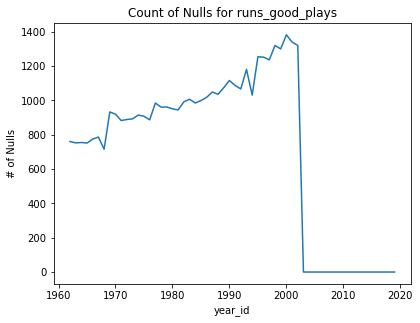

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (6.4,4.8))
ax.plot(batting.isnull().groupby(batting['year_id']).sum().runs_good_plays)
ax.set_title('Count of Nulls for runs_good_plays')
ax.set_ylabel('# of Nulls')
ax.set_xlabel('year_id');

`runs_good_plays` only has values from 2003 onward. Baseball-Reference changed their fielding/defense runs values from TZR (total zone rating) to DRS (defensive runs saved) in 2003. `runs_good_plays` is a variable only present in DRS.